In [1]:
# 'W1_L200_N2.txt'
# 'W1_L200_N_0.txt'
# 'W1_L200_N_1.txt'
# 'W1_L200_NN.txt'
# 'W2_L100_N2.txt'
# 'W2_L100_N_0.txt' 74!
# 'W2_L100_N_1.txt'
# 'W2_L100_NN.txt'
# 'W4_L50_N2.txt'
# 'W4_L50_N_0.txt'
# 'W4_L50_N_1.txt'
# 'W4_L50_NN.txt'
# 'W5_L40_N2.txt'
# 'W5_L40_N_0.txt'
# 'W5_L40_N_1.txt'
# 'W5_L40_NN.txt'

In [2]:
files_list1 = ['W1_L200_N2.txt','W1_L200_NN.txt','W2_L100_N2.txt','W2_L100_NN.txt',\
              'W4_L50_N2.txt','W4_L50_NN.txt','W5_L40_N2.txt','W5_L40_NN.txt']

files_list2 = ['W1_L200_N_0.txt','W1_L200_N_1.txt','W2_L100_N_0.txt','W2_L100_N_1.txt',\
               'W4_L50_N_0.txt','W4_L50_N_1.txt','W5_L40_N_0.txt','W5_L40_N_1.txt']

# w1_n0_file[0].split('=')[1].split(' ')[0]
# float(w1_n0_file[0].split('=')[3].strip())

In [3]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def energy_list(file_name):
    file = open(file_name).read().splitlines()
    lis = []
    en = []
    n = []
    for i in file:
        n_up = int(i.split('=')[1].split(' ')[0])
        energy = float(i.split('=')[3].strip())
        lis.append([n_up, energy])
        lis = sorted(lis, key=lambda x: x[0])
    for j in lis:
        en.append(j[1])
        n.append(j[0])
    return en

In [5]:
def mu_h_list(file_name1,file_name2, n):
    en1 = energy_list(file_name1)
    en2 = energy_list(file_name2)
    h = []
    mu = []
    for x in range(1, n):
        h.append((en2[x - 1] - en1[x]) / -2)
        mu.append((en2[x + 1] - en1[x]) / 2)
    return mu,h

In [6]:
n = 60
mu1 = mu_h_list(files_list2[0], files_list2[1],n)[0]
h1 = mu_h_list(files_list2[0], files_list2[1], n)[1]

n=43
mu2 = mu_h_list(files_list2[2], files_list2[3],n)[0]
h2= mu_h_list(files_list2[2], files_list2[3], n)[1]

n=17
mu4 = mu_h_list(files_list2[4], files_list2[5],n)[0]
h4= mu_h_list(files_list2[4], files_list2[5], n)[1]

n=12
mu5 = mu_h_list(files_list2[6], files_list2[7],n)[0]
h5= mu_h_list(files_list2[6], files_list2[7], n)[1]

In [7]:
mu1_new = [x - mu1[0] for x in mu1]
h1_new = [x - h1[0] for x in h1]

mu2_new = [x - mu2[0] for x in mu2]
h2_new = [x - h2[0] for x in h2]

mu4_new = [x - mu4[0] for x in mu4]
h4_new = [x - h4[0] for x in h4]

mu5_new = [x - mu5[0] for x in mu5]
h5_new = [x - h5[0] for x in h5]

<IPython.core.display.Javascript object>


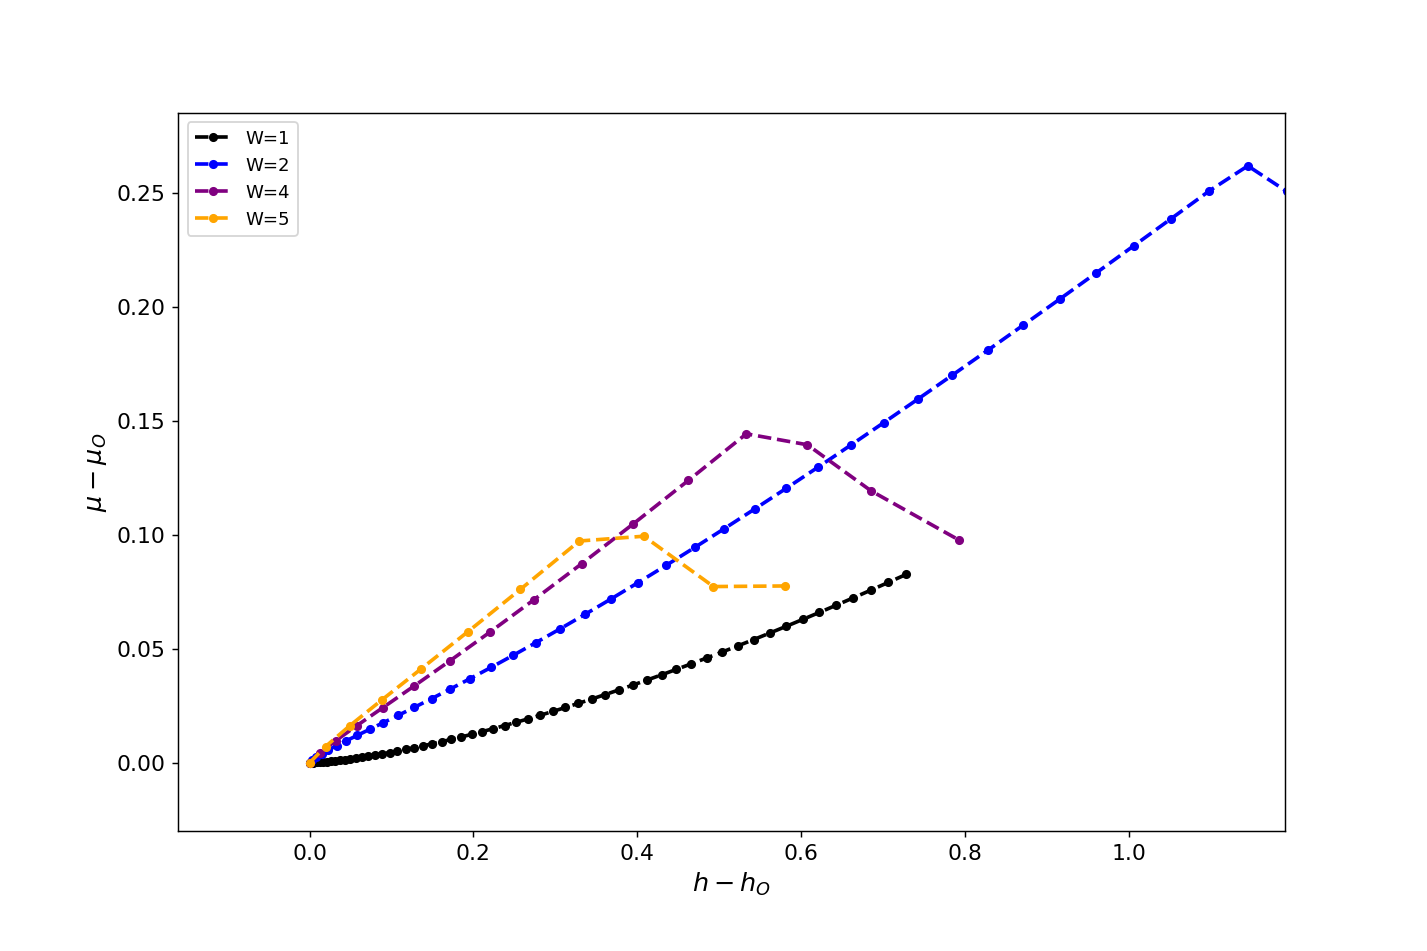

In [9]:
%matplotlib notebook
kwds = dict(ls='--', marker='o', lw=2, markersize=4)
plt.plot(h1_new, mu1_new, label='W=1', color='black', **kwds)
plt.plot(h2_new, mu2_new, label='W=2', color='blue', **kwds)
plt.plot(h4_new, mu4_new, label='W=4', color='purple', **kwds)
plt.plot(h5_new, mu5_new, label='W=5', color='orange', **kwds)

plt.xlabel('$h - h_O$', size=14)
plt.ylabel('$\mu - \mu_O$', size=14)

plt.gca().xaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.set_tick_params(labelsize=12)

plt.ylim([-0.03, 0.285])
plt.xlim([-0.16, 1.19])

plt.legend()